# EE 120 Lab 0: Scientific Python Tutorial

**Signals and Systems** at UC Berkeley

Acknowledgements:

- **Spring 2019** (v1.0): Dominic Carrano, Sukrit Arora, Babak Ayazifar  
- **Fall 2019** (v2.0): Dominic Carrano  
- **Spring 2020** (v2.1): Dominic Carrano

In [1]:
# Click on me and hit Shift + Enter!
import numpy as np
import matplotlib.pyplot as plt
import lab0_helper
%matplotlib inline

# Q1: The Python Scientific Computing Stack

If you have taken CS 61A or EECS 16AB, you're already familiar with the Python programming language and some of its scientific computing capabilities, but this should still be a nice refresher. If you haven't, then this lab will get you up to speed on everything you need to know to complete the labs this semester.

This question was adapted and extended from the [Berkeley Python Bootcamp 2013](https://github.com/profjsb/python-bootcamp), 
[Python for Signal Processing](http://link.springer.com/book/10.1007%2F978-3-319-01342-8), [EE 123](https://inst.eecs.berkeley.edu/~ee123/sp18/lab/lab0/python_tutorial.ipynb), and [EECS 126](https://inst.eecs.berkeley.edu/~ee126/sp18/LAB01.zip) Jupyter Notebook Tutorials. Note that there's no code to write for this question; it's entirely an interactive demo. Feel free to open up cells and experiment!

## Q1a: The Jupyter Notebook Environment

This interactive tool we're currently working in, and that we'll be using for all the labs this semester, is known as a *Jupyter Notebook*. It came out in ~2015 as a spinoff of the iPython platform. It's an incredible tool for interactive programming and experimentation that you'll learn to love this semester. Fun fact: one of the lead contributors, Fernando Perez, is a professor here at Berkeley!

### Cells

The Jupyter Notebook is divided into cells. Each cell can contain texts, codes or html scripts. Running a non-code cell simply advances to the next cell. To run a code cell using Shift-Enter or pressing the play button in the toolbar above:

In [2]:
1+2

3

### Interrupting the kernel

For debugging, often we would like to interupt the current running process. This can be done by pressing the stop button, the black box in between the Run and Restart buttons.

When a processing is running, the circle on the right upper corner is filled. When idle, the circle is empty.

In [ ]:
import time

while(1):
    print("error")
    time.sleep(1)

### Restarting the Kernels

Interrupting sometimes does not work. You can reset the state by restarting the kernel by clicking `Kernel -> Restart`, or the Refresh button in the toolbar above.

### Saving the Notebook

To save your notebook, you can select `"File->Save and Checkpoint"`. Alternatively, for a shortcut, hit `Command-s` on Mac or `Ctrl-s` on Windows. Try it out right now to make sure your work is saved.

### Undoing

To undo changes in each cell, hit `Command-z` for Mac and `Ctrl-z` for Windows.
To undo `Delete Cell`, select `Edit->Undo Delete Cell`.

### Tab Completion

One useful feature of iPython notebook is tab completion, which can save you a lot of time in typing out variable and function names while writing code. Try it out below!

In [ ]:
one_plus_one = 1+1

# type `one_` then hit TAB will auto-complete the variable
print(one_plus_one)

### Help Menu for Functions

Another useful feature is the help command. Type any function followed by `?` returns a help window. This is an incredibly underappreciated feature of iPython notebook, as it enables you to get all the information you need about a function (e.g., what arguments it exptects, what it returns and in what order) without searching for the documentation online. Hit the `x` button to close it.

In [ ]:
abs?

### Other Jupyter Notebook Navigation Tips
- To add a new cell, either select `"Insert->Insert New Cell Below"` or click the white plus button.
- You can change the cell mode from code to text in the pulldown menu. I use `Markdown` for text.
- You can change the texts in the `Markdown` cells by double-clicking them.
- `Help->Keyboard Shortcuts` has a list of keyboard shortcuts.

### Libraries

These are the libraries that we will be using in this class:
    
- __NumPy__: The fundamental package for scientific computing with Python.

- __SciPy__: A collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics and much more.

- __Matplotlib__: A Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

#### About Each

NumPy and Matplotlib are almost like sub-programming languages inside Python for scientific computing and plotting, respectively. By the end of this semester, you'll be well-seasoned in both. 

SciPy, on the other hand, is a collection of useful functions that you'll look up when you need to do something really specific that NumPy doesn't have, like digital filter design (see EE 123 for more) or some more complicated algorithms like k-means clustering (as you saw in EE 16B).

### Importing

To import a specific library `x`, simply type `import x`.

To access the library function `f`, type `x.f`.

If you want to change the library name to `y`, type `import x as y`.

In [ ]:
# CONVENTION: "import numpy as np" when importing numpy, it lets us use "np" as shorthand!

# You could just as easily do "import numpy as derp", but then you'd have all this weird code
# like "derp.convolve(x, h, mode='full')" - the standard convention is to use "np" for numpy
import numpy as np 
np.ones((3,1))

## Q1b: Data Representation in Python and NumPy

### Floats and Integers

Unlike MATLAB, there is a difference between the `int` and `float` types in Python 2.  Mainly, integer division returns the floor in Python 2. However, in Python 3 floor division is done with "//". Make sure you know what version you're working with!

In [ ]:
1 / 4 # in Python 2, returns 0; in Python 3, returns 0.25

In [ ]:
1 / 4.0

In [ ]:
1 // 4 # floor division in Python 3 with "//"

### Strings

Unlike Java or C, double quotes ("I am double quoted!") and single quotes ('I, however, am single quoted') are the same thing in Python. Both represent strings. Python lets us use `'+'` to concatenates strings, making for very simple and readable code.

In [ ]:
"EE " + '120' # we can mix and match single and double quotes and Python won't care

### Lists

A list is a **mutable** array of data. That is, we can change it after we create it. They can be created using square brackets: `[]`.


Important functions: 
- `'+'` concatenates lists. 
- `len(x)` returns the number of elements in the list.

In [ ]:
x = ["EE"] + [1, 2, 0]
print(x)

In [ ]:
print(len(x))

We can also write **list comprehensions** which enable us to perform some iterative computation to construct a list without having to explicitly write out a for loop. The expression `[f(i) for i in some_other_iterable]`, where `f` is some Python function, will generate the list `[f(my_other_list[0]), ..., f(my_other_list[-1])]`. 

Below is an example to generate the squares of the first 10 positive integers.

In [ ]:
def square(x):
    return x * x

[square(i) for i in range(1, 11)]

### Tuples

A tuple is an immutable list. They can be created using round brackets (). 
They are usually used as inputs and outputs to functions.

In [5]:
t = ("E", "E") + (1, 2, 0)
print(t)

('E', 'E', 1, 2, 0)


In [ ]:
# cannot do assignment to a tuple after creation - it's immutable
t[4] = 3 # will error

# note: errors in ipython notebook appear "inline", i.e. inside the notebook itself

### Functions

Functions take in a set of arguments, and return (possibly multiple) values. Here's an example of a function that checks if a number is divisible by 3, using Python's modulus operator (`a % b` returns the remainder of dividing `a` by `b`; if the remainder is 0, then `a` is divisible by `b`):

In [ ]:
def is_divisible_by_3(x):
    return x % 3 == 0

print("6 is divisible by 3? {0}".format(is_divisible_by_3(6)))
print("8 is divisible by 3? {0}".format(is_divisible_by_3(8)))

You can also return multiple values from a function at once; just separate them with commas in the return statement. Similarly, to assign them to values after the function call, just separate the variables you want to assign the return values to by commas. Here's a dummy example that takes in two numbers, and returns their sum and their difference:

In [ ]:
def sum_and_diff(x, y):
    return x+y, x-y

a, b = sum_and_diff(3, 5)
print(a) # 3 + 5 = 8
print(b) # 3 - 5 = -2 

### NumPy Array

The NumPy array, aka an "ndarray", is like a list with multidimensional support and more functions. This will be the primary data structure in our class.

Arithmetic operations on NumPy arrays correspond to elementwise operations. 

Important NumPy Array functions:

- `.shape` returns the dimensions of the array.

- `.ndim` returns the number of dimensions. 

- `.size` returns the number of entries in the array.

- `len()` returns the first dimension.


To use functions in NumPy, we have to import NumPy to our workspace. This is done by the command `import numpy`. By convention, we rename `numpy` as `np` for convenience.

### Creating a NumPy Array

In [6]:
x = np.array([[1, 2], [3 , 4]])
print(x)

[[1 2]
 [3 4]]


### Getting the shape of a NumPy Array

In [7]:
x.shape # returns the dimensions of the numpy array

(2, 2)

In [8]:
np.shape(x) # equivalent to x.shape

(2, 2)

## Q1c: Operations on Data in Python and NumPy

### Elementwise operations

One major advantage of using NumPy arrays is that arithmetic operations on NumPy arrays correspond to elementwise operations. This makes NumPy amenable to vectorized implementations of algorithms, a common technique used for speeding up computer simulations than can be parallelized.

In [9]:
print(x)
print()
print(x + 2) # numpy is smart and assumes you want this to be done to all elements!

[[1 2]
 [3 4]]

[[3 4]
 [5 6]]


### Matrix multiplication

You can use `np.matrix` with the multiplication operator or `np.dot` to do matrix multiplication.

In [10]:
print(np.matrix(x) * np.matrix(x))
print() # newline for formatting

# Or
print(np.dot(x,x))

[[ 7 10]
 [15 22]]

[[ 7 10]
 [15 22]]


### Slicing NumPy arrays

NumPy uses pass-by-reference semantics so it creates views into the existing array, without implicit copying. This is particularly helpful with very large arrays because copying can be slow.

In [11]:
x = np.array([1,2,3,4,5,6])
print(x)

[1 2 3 4 5 6]


We slice an array from a to b-1 with `[a:b]`.

In [12]:
y = x[0:4]
print(y)

[1 2 3 4]


Because slicing does not copy the array, changing `y` changes `x`.

In [13]:
y[0] = 7
print(x)
print(y)

[7 2 3 4 5 6]
[7 2 3 4]


To actually copy x, we should use `.copy()`. 

In [14]:
x = np.array([1,2,3,4,5,6])
y = x.copy()
y[0] = 7
print(x)
print(y)

[1 2 3 4 5 6]
[7 2 3 4 5 6]


### Useful Numpy function: arange

We use `arange` to create integer sequences in NumPy arrays. It's exactly like the normal range function in Python, except that it automatically returns the result as a NumPy array, rather than the plain vanilla Python list.

`arange(0,N)` creates an array listing every integer from 0 to N-1.

`arange(0,N,m)` creates an array listing every `m` th integer from 0 to N-1 .

In [15]:
print(np.arange(-5,5)) # every integer from -5 ... 4

[-5 -4 -3 -2 -1  0  1  2  3  4]


In [16]:
print(np.arange(0,5,2)) # every other integer from 0 ... 4

[0 2 4]


## Q1d: Visualizing Data

Most of the work in scientific computing is in writing and debugging code. But no one cares about your code, they care about your results! Accordingly, it's important to be able to generate a nice looking plot that summarizes your results. Plotting is also a great debugging tool. 

We'll be using [Matplotlib](https://matplotlib.org/) for plotting signals and images in the labs. Specifically, we'll use the `pyplot` module, used for visualizing one-dimensional data, such as signals. By convention, we import `matplotlib.pyplot` as `plt`, so that when we call functions to generate our visuals, such as `matplotlib.pyplot.plot`, the function to plot, we can use the shorthand `plt.plot` instead.

**To display the plots inside the browser, we use the command `%matplotlib inline` - do not forget this line whenever you start a new notebook.** This stops Python from opening a separate graphics window, displaying all plots directly inside the notebook instead. We'll always include it for you, but in case your plots aren't showing up in the notebook when you're playing around on your own, it's probably because you forgot this. If you don't include it, Python will default to displaying it in another window on your computer, which normally is fine, but here we need the plots in the notebook so they show up in your submission PDF.

In [17]:
import matplotlib.pyplot as plt # by convention, we import matplotlib.pyplot as plt

# plot in browser instead of opening new windows
%matplotlib inline

In [18]:
# Generate signals
x = np.arange(0, 1, 0.001)
y1 = np.exp(-x)                              # decaying exponential
y2 = np.sin(2 * np.pi * 10.0 * x)/4.0 + 0.5  # 10 Hz sine wave

### Plotting One Signal

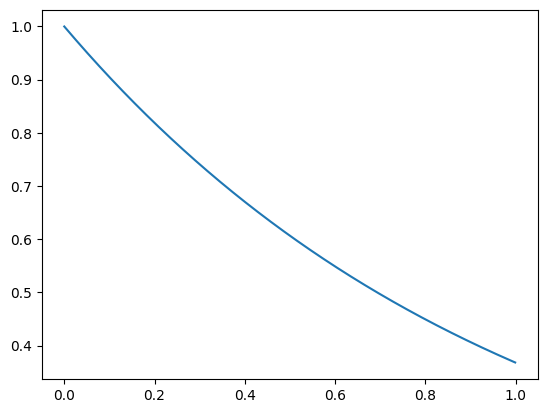

In [19]:
plt.figure()
plt.plot(x, y1)
plt.show()

### Plotting Multiple Signals in One Figure

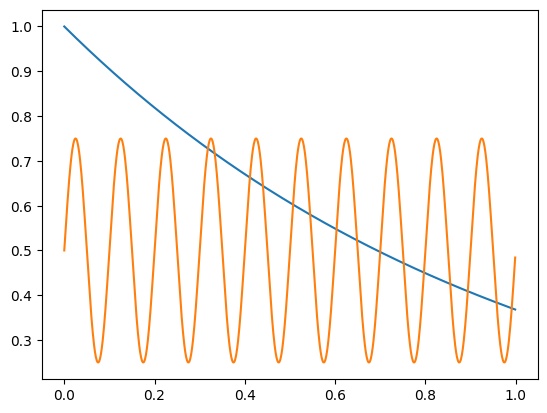

In [20]:
plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.show()

### Plotting multiple signals in different figures

In [ ]:
# figsize is the dimensions of the figure:
# - the first argument is the width
# - the second is height

# it's useful when you want to adjust the figure's dimensions, e.g. you 
# need a huge x-axis for data taken over a long time period
plt.figure(figsize=(16, 4))
plt.plot(x, y1)

# fancy formatting stuff - try playing with it!
plt.title("Decaying Exponential")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.legend(["$e^{-x}$"])    # LaTeX fancy formatting
plt.xlim([0, 1])            # zoom in on x-axis 


# asking plt for a new figure before plotting will put the next call to plt.plot
# on that new figure
plt.figure(figsize=(16, 4)) 
plt.plot(x, y2)
plt.title("10 Hz Sine Wave")

# ALWAYS make sure to call plt.show() *ONCE* after all your plotting code so your plots are displayed!
# You only need to call it once per code cell, even if you have multiple figures.
plt.show()

**Make no mistake - the data points used for plotting on a computer truly always are discrete, but matplotlib's `plt.plot()` function interpolates them, giving us the continuous waveforms you see above.**

You can also add a title and legend with `plt.title()`, `plt.legend()` to make your plots look professional. Using dollar signs, you can add math symbols, as in LaTeX.

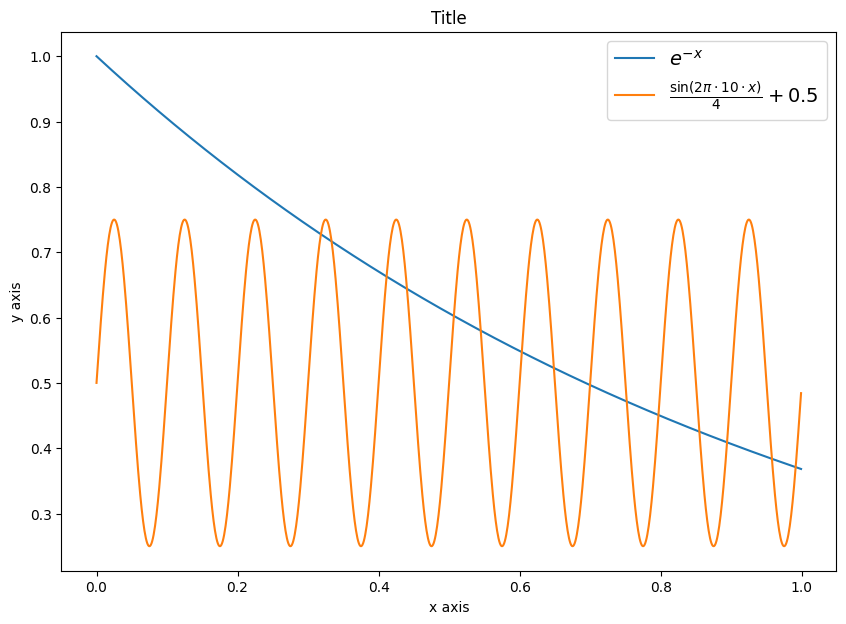

In [21]:
# The figsize parameter can help you shape your figure
plt.figure(figsize=(10,7))
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("Title")

# You can also change the legend font size by passing in the fontsize= paramater
plt.legend((r'$e^{-x}$', r'$\frac{\sin(2\pi \cdot 10\cdot x)}{4}+0.5$'), fontsize=14)
plt.show()

You can also specify more options in `plot()`, such as color and linewidth. You can also change the axis using `plt.axis`.

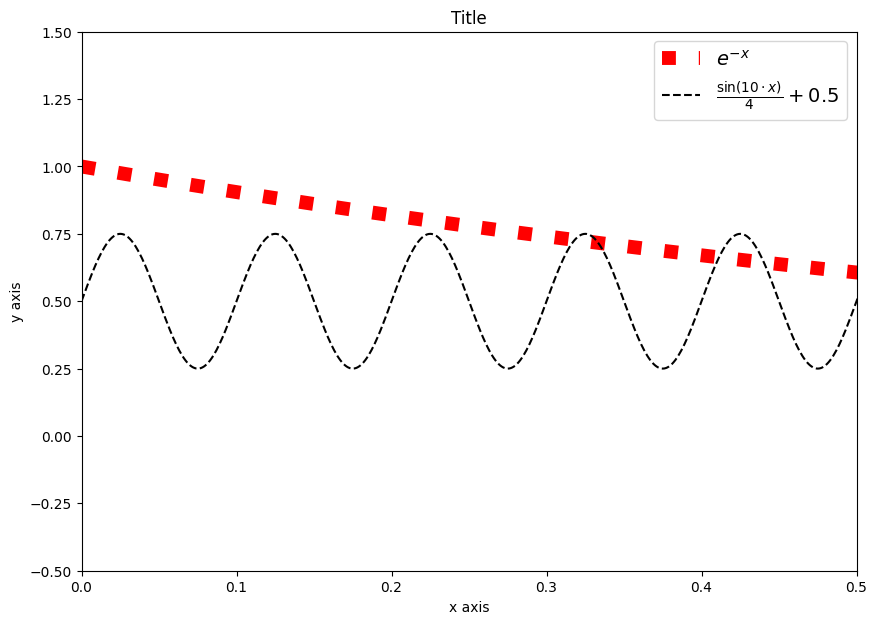

In [22]:
plt.figure(figsize=(10,7))
plt.plot(x, y1, ":r", linewidth=10)
plt.plot(x, y2, "--k")
plt.xlabel("x axis")
plt.ylabel("y axis")

plt.title("Title")

plt.legend((r'$e^{-x}$', r'$\frac{\sin(10\cdot x)}{4}+0.5$'), fontsize=14)

# plt.axis takes in a list of the form [x_lower, x_upper, y_lower, y_upper]
plt.axis([0, 0.5, -0.5, 1.5])
plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

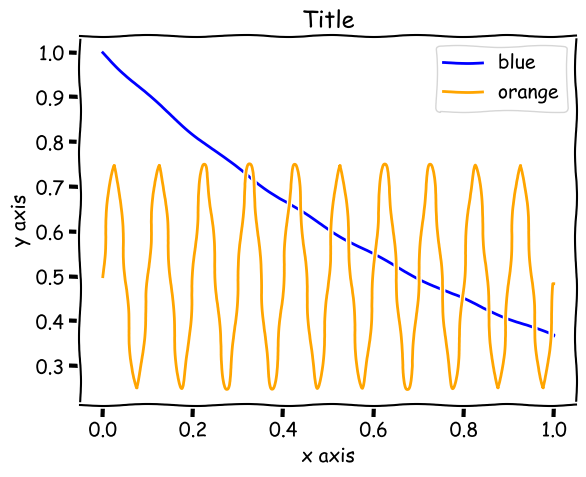

In [23]:
# xkcd: the Comic sans of plot styles
with plt.xkcd():
    plt.figure()
    plt.plot(x, y1, 'b')
    plt.plot(x, y2, color='orange')
    plt.xlabel("x axis")
    plt.ylabel("y axis")
    plt.title("Title")
    plt.legend(("blue", "orange"))
    plt.show()

### Other Plotting Functions

There are many other plotting functions. For example, we will use `plt.imshow()` for showing images.

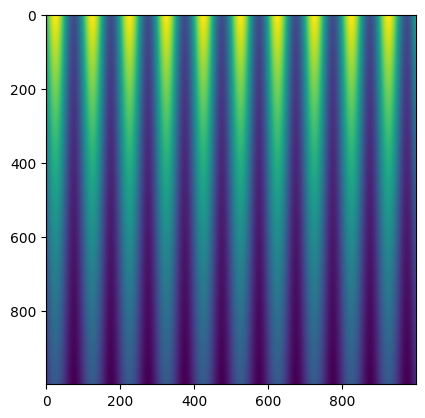

In [24]:
image = np.outer(y1, y2) # plotting the outer product of y1 and y2

plt.figure()
plt.imshow(image)
plt.show()

Similarly, we use `plt.stem()` for plotting discretized signals (technically, on a computer, everything is discretized, but it's often as a result of sampling something continuous, in which case it's often more informative to plot it as a continuous signal with `plt.plot()`).

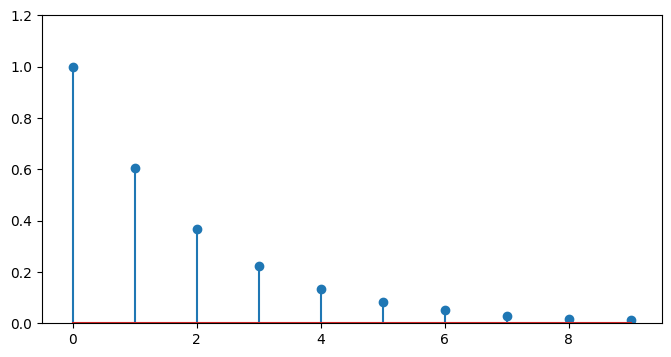

In [25]:
# decaying exponential
n = np.arange(0, 10)
signal = np.exp(-n / 2) 

# stem plot on an 8-by-4 inch figure
plt.figure(figsize=(8, 4))
plt.stem(n, signal)

# zoom out a little on both axes to get cleaner looking plot
plt.xlim([-.5, 9.5])
plt.ylim([0, 1.2])
plt.show()

# Q2: Practice with Signals

Now that you're acquainted with the basics of Python and the Jupyter Notebook environment, we'll practice generating and plotting signals. This is a great starting point, since generating and visualizing signals makes up most of what we do in the labs; the signals (and what we do with them) just get more interesting as we progress through the semester.

## What is a signal?

In EE 120, almost all signals we work with will be functions of a single independent variable — known as "1D" signals  — which represents time. Considering signals as functions is an incredibly useful idea, as it enables us to do all sorts of operations on them that you're already familar with, such as multiplying them elementwise or taking linear combinations of them. There are two types of signals we'll consider in this class, detailed below.
- **Discrete Time (DT) signals:**
    - Functions from the integers, $\{..., -2, -1, 0, 1, 2, ...\}$, to the real (or complex) numbers.
    - The variable for time, an integer, is typically represented using $n, k$ or $m$.
    - Visualized using "lollipop plots", such as the one in the last example of Question 1. The point on the end of the lollipop indicates the signal value at a given input.
- **Continuous Time (CT) signals:**
    - Functions from the real numbers to the real (or complex) numbers.
    - The variable for time, a real number, is typically represented using $t$ or $\tau$.
    - Visualized using the standard plots you've seen in high school, with a continuously varying independent variable ($t$) on the horiztonal axis, and the continuously varying dependent variable ($x(t)$) on the vertical axis.

Later in the semester, we'll see how, under certain assumptions, we can go back and forth between the continuous and discrete realms using sampling and interpolation without any loss of information.

## Pencil and Paper vs Python: Interpreting time indices

When working on a computer, there is a key limitation we must cope with: **finite memory**. We can't store a signal's value for every integer (in the DT case) or every real number (in the CT case). Instead, we represent signals as discrete arrays of some fixed length $ N $. As a result, there are understood conventions in signals and systems for how to interpret the time indices associated with a signal's array representation on a computer. Suppose we have a Python variable `sig`, which is a NumPy array representing a signal.
- **If `sig` represents a DT signal $x$:** 
    - `sig[0]` is interpreted as corresponding to time zero, that is, $x(0)$. 
    - `sig[N-1]` corresponds to $x(N-1)$. Remember, there are a total of $N$ values since we can't store infinitely many, so this is the end of the array. 
    - This convention is quite natural, as it's the same as the array indexing convention in most programming languages. 
- **If `sig` represents a CT signal $y$**: 
    - All CT signals are first *sampled* before they go onto a computer for processing — we can't store a countably infinite number of values in the DT case, so we certainly can't store an uncountably infinite number for CT.
    - The solution is to sample the signal value every $T$ seconds, taking $N$ total to form an array we can use in Python. This means the array contains $y(0), y(T), y(2T), ..., y((N-1) T)$. As in the DT case, `sig[0]` is understood to correspond to $y(0)$. 
        - To give a concrete example, digital audio is typically obtained by sampling acoustic pressure on a microphone (a CT signal) at 44.1 kHz, or 44100 times a second. This means that each sample is separated by $T=1/44100$ seconds. 
        - Taking the variable $t$ to be measured in seconds, we see that `sig[1]` is $y(1/44100)$, `sig[2]` is $y(2/44100)$, and so on. 
        - The last array entry, `sig[N-1]`, is $y((N-1)/44100)$.
- Depending on whether `sig` represents a DT signal or a CT signal, we'll may plot it using a lollipop plot (with `plt.stem`) or a standard, smooth interpolated plot (with `plt.plot`).

**In both DT and CT, we assume that before the first and after the $N$th array value, the true signal $x$ or $y$ is zero.** In practice, the true signal may not actually be zero outside this range. Part of the data acquisition process is making sure the $N$ values you have are good enough, so that we can safely ignore any truncation that may have occurred once we move on to doing the actual signal processing.

In this question, we'll only consider DT signals, with associated time indices given to you. Sometimes, you'll be asked to include some of the implicit zeros as you gain comfort with these conventions. Later in the lab, you'll have a chance to play around with CT signals.

## Q2a: The Rectangular Signal

The length $L$ rectangular signal (sometimes also called the "rect" for short, or, alternatively, the "boxcar" signal) is defined as

$$r(n) = \begin{cases}1 & n = 0, 1, 2, ..., L - 1 \\ 0 & \text{otherwise}\end{cases}$$

Here's an example plot for $L = 7$, with time indices shown from -2 to 8 (so some implicit zeros are shown):

![](len7rect.png)

Some alternate definitions of the rect will normalize it (so that each nonzero point of the signal has height $1/L$), and some will center it around zero (although this can only be done when $L$ is odd, so that there is a center point and an equal number of nonzero signal points on each side of $n = 0$).

### Your Job

Fill in the cell below to *generate and plot* a **length 5** rectangular signal, with the time indices ranging from -2 to 8. 

Some quick refreshers from the content of Question 1:  
- We represent both signals and time indices as NumPy arrays. For example, a length 3 rectangular signal can be constructed using the code `np.array([1, 1, 1])`, assuming you wanted to consider it for $n = 0, 1, 2$. 
- The function `np.arange` is extremely useful for generating sequences of numbers, as we often require when creating time indices for our data, as NumPy arrays.
- When calling `plt.stem(x, y)`, the number of elements in `x` must equal the number of elements in `y`. To solve this, we can pad on some of the implicit zeros in our signal, as was done in the above plot, where the zeros for $n=-2,-1,7,8$ were included.

As in the plot above, label x and y axes with `plt.xlabel` and `plt.ylabel` (using $n$ and $r(n)$ respectively as was done above is fine; we just want you to get in the habit of labelling your plots). Additionally, use `plt.title` to title your plot as "Length 5 Rectangular Signal".

**Hint:** We use `plt.stem`, not `plt.plot`, for generating "lollipop" plots for discrete-time signals.

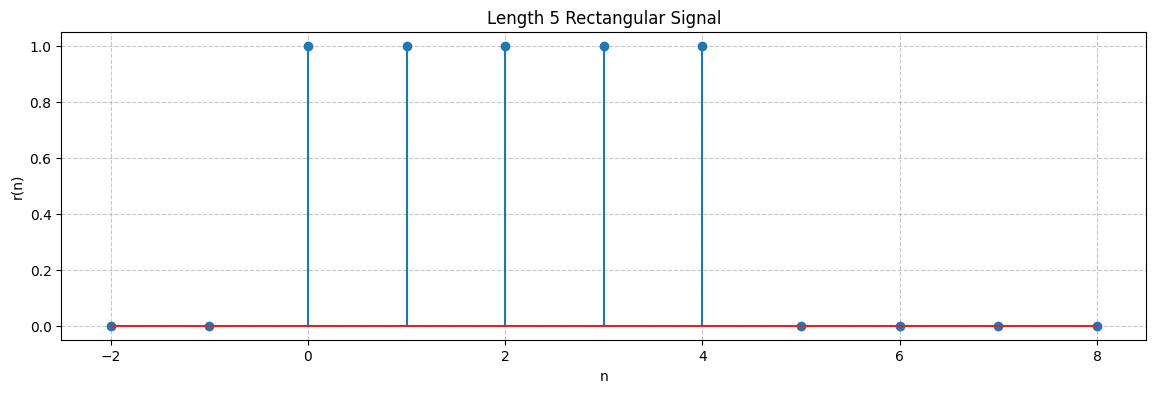

In [29]:
# TODO: Length 5 rectangular signal code + plot for n=-2 to 8
plt.figure(figsize=(14,4))
n = np.arange(-2, 9)
signal = np.where((n >= 0) & (n < 5), 1, 0)
plt.stem(n, signal)
plt.title("Length 5 Rectangular Signal")
plt.xlabel("n")
plt.ylabel("r(n)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Now, fill in the cell below to *generate and plot* a **length 50** rectangular signal, with the **time indices ranging from 0 to 59**. Give your plot the title "Length 50 Rectangular Signal".

**Hint:** It's very tedious to type out 50 ones and 10 zeros. This is a great time to practice using the functions `np.concatenate`, `np.ones`, and `np.zeros`.

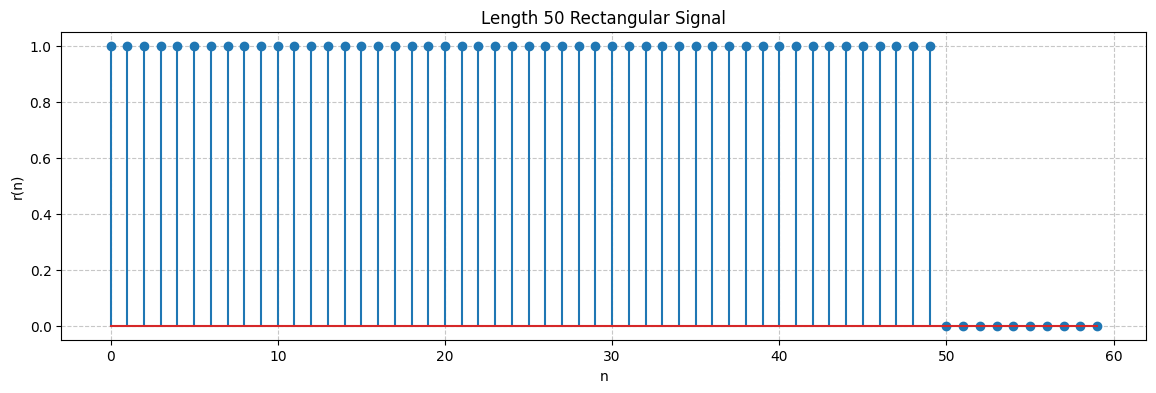

In [33]:
# TODO: Length 50 rectangular signal code + plot for n=0 to 59
y = np.concatenate((np.ones(50), np.zeros(10)), axis = 0)
n = np.arange(0,60)
plt.figure(figsize=(14,4))
plt.stem(n, y)
plt.title("Length 50 Rectangular Signal")
plt.xlabel("n")
plt.ylabel("r(n)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Now, fill in the cell below to *generate and plot* a **length 13** rectangular signal, with the **time indices ranging from 0 to 12**. Give your plot the title "Length 13 Rectangular Signal". Note that the indices 0 to 12 correspond to a total of 13 time points, so no padding of the implicit zeros is necessary.

In [ ]:
# TODO: Length 13 rectangular signal code + plot for n=0 to 12


Finally, fill in the cell below to *generate and plot* a **length 13** rectangular signal, with the **time indices ranging from -10 to 10**. This time, there's a twist: instead of using the definition above as we did in the previous part, make this signal zero-cenetered, so that the signal is nonzero from -6 to 6. Give your plot the title "Zero-Centered Length 13 Rectangular Signal".

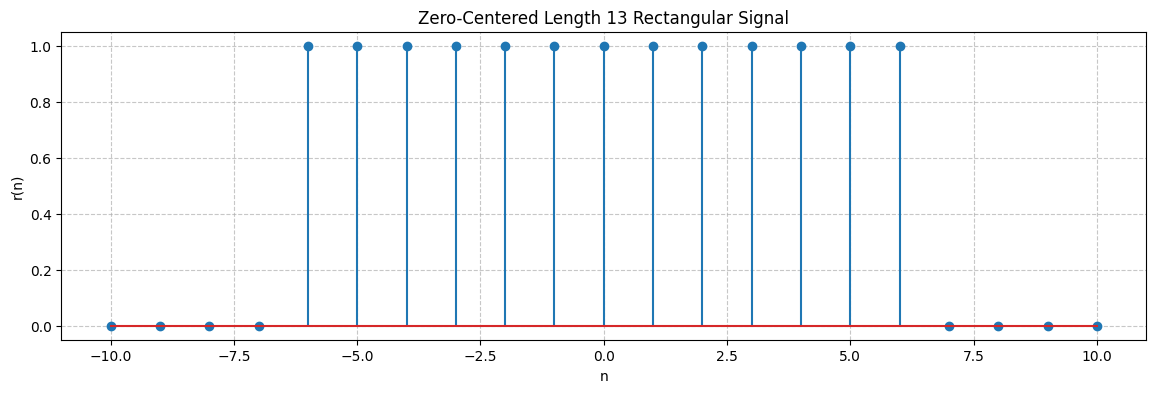

In [ ]:
# TODO: Zero-centered length 13 rectangular signal code + plot for n=-10 to 10
plt.figure(figsize=(14,4))
n = np.arange(-10, 11)
r = np.where((n >= -6)&(n < 7), 1, 0)
plt.stem(n, r)
plt.title("Zero-Centered Length 13 Rectangular Signal")
plt.xlabel("n")
plt.ylabel("r(n)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Q2b: The One-Sided Decaying Exponential Signal

We define the rate $r$, for all real numbers $r > 0$, one-sided decaying exponential signal as 

$$x(n) = e^{-rn} u(n) = \begin{cases}e^{-rn} & n = 0, 1, 2, ... \\ 0 & \text{otherwise}\end{cases}$$

Again, we've adopted the convention of starting our signal at $n=0$. Specifically, this one-sided decaying exponential is said to be *right-sided* since it decays as we go to the right (in fact, since the first nonzero point is at $n=0$, we call the signal *causal*). 

Here's a plot of the signal for a few different values of $r$, displayed for $n=-5$ to $n=20$:

![](decayingexpos.png)

As we increase $r$, the signal decays to zero faster and faster. In the case of $r = 0$, we obtain the unit step, which doesn't decay at all.

### Coping with infinite duration signals: Truncation

Note that for all $r > 0$, the signal has infinite duration, unlike our rectangular signal: we can pick an arbitrary $n > 0$, and $x(n)$ will be nonzero (in fact, it will be positive, since the exponential function is always positive).  

This creates an issue for us, since we can't store an infinite number of signal values. Fortunately, there's an easy and well-justified solution: *truncation*. Just as calling the "int" function causes Python to cast floating-point numbers to integers by chopping off, or *truncating*, the decimal part of the number (e.g. `int(3.1415) = 3`, so that `.1415` is removed), we can ignore all the signal values past some point by not including them. For example, in the above plots, we truncate the signals at $n=20$, so there are only 21 nonzero points in the output. The reason this is well-justified is that for most rates that aren't too small, exponentials decay very rapidly. In the first two plots above, for $n=20$, the signal value appears to have already decayed to zero anyways! For the third, we'd simply need to use more data points (likely around 50-100) if we wanted to capture all signal values above ~.001 or so.

### Your Job

Rather than recreate the same code for generating our signal several times as we did in Q2a, let's create a function for generating our one-sided decaying exponential signal. Then, we can just call the function each time we want to generate the signal. Fill in the `decaying_expo` function below according to the docstring. For credit, make sure to run the test cases.

If you're unsure of how to return multiple values from a Python function, you should go back to Q1.

**Hint:** Your function needs to handle two separate cases: `n_start >= 0`, and `n_start < 0`. We recommend you define two variables: one for your time indices, and one for your signal. Then, based on `n_start`, assign them the appropriate values.

In [44]:
def decaying_expo(rate, n_start, n_end):
    """
    Returns a right-sided decaying exponential signal, truncated to the provided indices.
    
    Parameters:
    rate    - The decay rate.
    n_start - The first time index to use in generating the signal. 
    n_end   - The last time index to use in generating the signal.
    
    Returns:
    n       - The time indices the signal is generated for: n_start, n_start + 1, ..., n_end.
    sig     - The signal values for each input in n.
    
    If n_start is not less than n_end, a ValueError will be raised, as this specifies an empty
    range of time indices to generate the signal over.    
    """    
    if n_start >= n_end:
        raise ValueError("n_start must be less than n_end")
    
    # TODO: YOUR CODE HERE
    x = np.arange(n_start, n_end + 1)
    sig = np.exp(-rate * (x))
    sig[x < 0] = 0
    return x, sig

In [45]:
lab0_helper.run_tests(decaying_expo)

Testing indices are correct when n_start >= 0
Test 1 Passed: True
Test 2 Passed: True

Testing signal values are correct when n_start >= 0
Test 3 Passed: True
Test 4 Passed: True
Test 5 Passed: True

Testing indices are correct when n_start < 0
Test 6 Passed: True
Test 7 Passed: True

Testing signal values are correct when n_start < 0
Test 8 Passed: True
Test 9 Passed: True
Test 10 Passed: True

10 out of 10 tests passed


/var/folders/t_/tkb8zb8s0vx_67p6fdz3rpj80000gn/T/ipykernel_21229/1219483710.py:22: RuntimeWarning: overflow encountered in exp
  sig = np.exp(-rate * (x))


Once all tests are passing, fill in the cell below to recreate the plot that was given to you above for the right-sided decaying exponentials. 

Using your shiny new and tested function, this should be pretty simple; the only work is in generating the plots. If you're unsure of how to plot multiple signals below one another, head back to the **"Plotting multiple signals in different figures"** section of Q1. Alternatively, if you're feeling fancy, this would be a great opportunity to try your hand at using matplotlib's [subplot](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.subplot.html) function to generate a 3x1 grid of plots within the same figure. Either plotting method is acceptable.

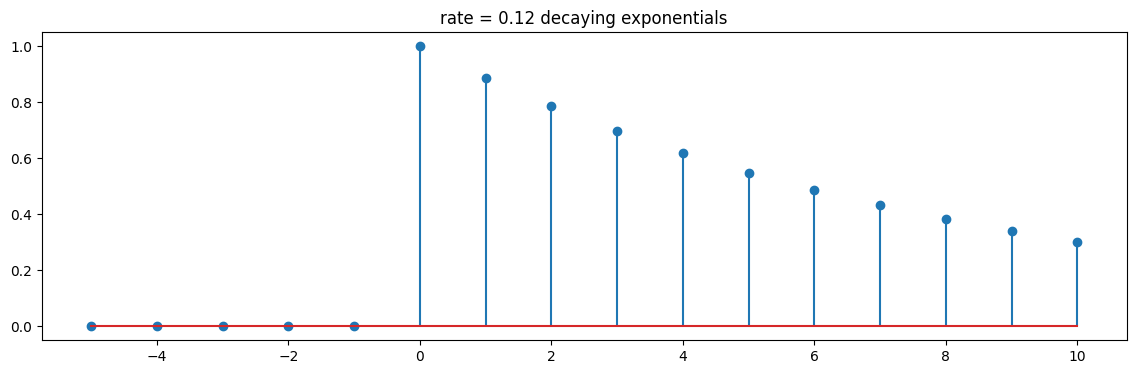

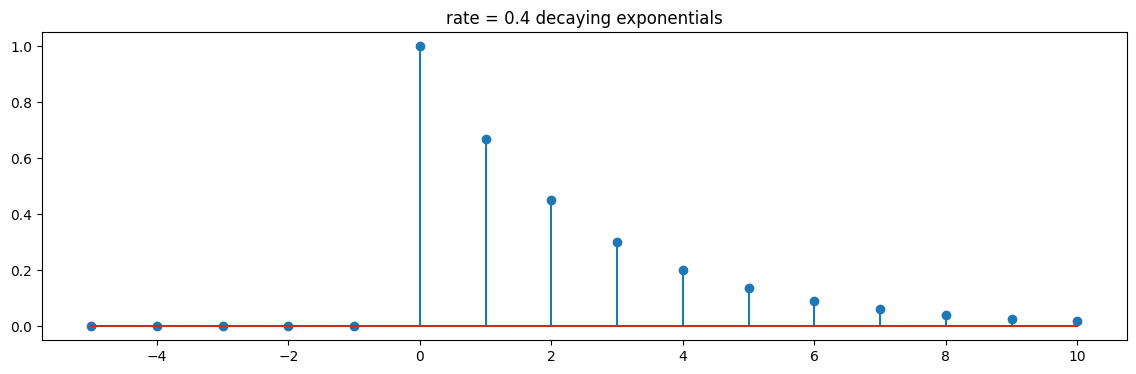

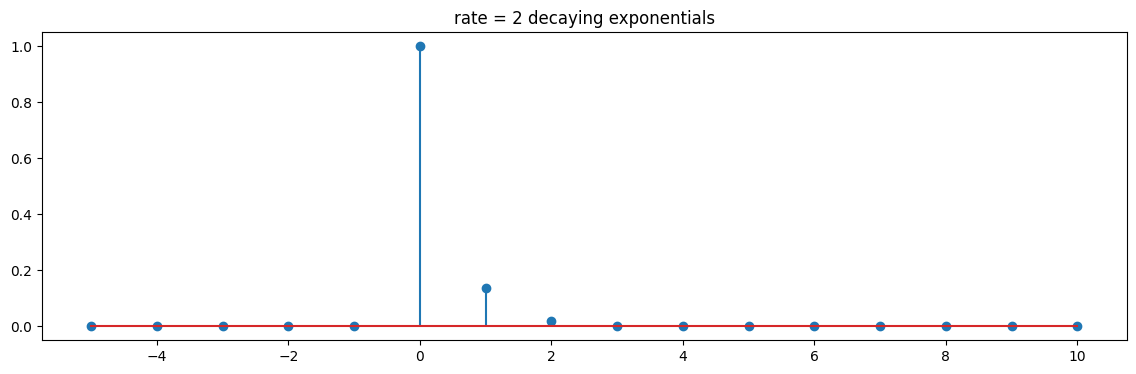

In [46]:
# TODO your signal/time index generation here
n_start = -5
n_end = 10
r = (0.12, 0.4, 2)
for i in r:
    plt.figure(figsize= (14,4))
    x, y = decaying_expo(i, n_start, n_end)
    plt.stem(x, y)
    plt.title(f"rate = {i} decaying exponentials")
# TODO your plotting code here


You can do a quick sanity check on your results by comparing to the original plot above. The two should match exactly. **Don't forget to add plot titles!**

# References
[1] The official Python 3 language documentation. [Link](https://docs.python.org/3/).  
[2] The official NumPy and SciPy documentation. [Link](https://docs.scipy.org/doc/).  
[3] The official Matplotlib documentation. [Link](https://matplotlib.org/contents.html).    

Special thanks to the [Berkeley Python Bootcamp 2013](https://github.com/profjsb/python-bootcamp), [Python for Signal Processing Tutorial](http://link.springer.com/book/10.1007%2F978-3-319-01342-8), [EE 123 Lab 0](https://inst.eecs.berkeley.edu/~ee123/sp18/lab/lab0/python_tutorial.ipynb) and [EECS 126 Lab 1](https://inst.eecs.berkeley.edu/~ee126/sp18/LAB01.zip) for providing a great starting point for Question 1 through their own publicly available tutorials.